In [1]:
!pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 135 kB 5.3 MB/s 


In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [ ]:
pip install keras-tuner --upgrade

In [2]:
fashion_mnsit = keras.datasets.fashion_mnist

In [43]:
(train_images,train_labels),(test_images,test_labels) = fashion_mnsit.load_data() 

In [44]:
print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


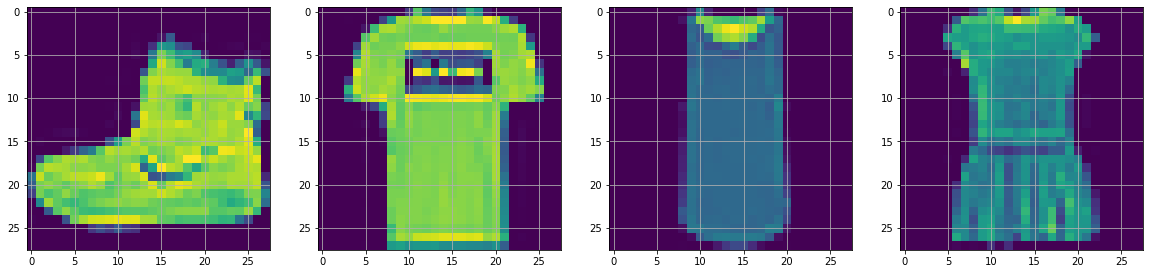

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, axs = plt.subplots(1,4, figsize=(20, 10))
for ax, i in zip(axs, range(6)):
    ax.imshow(train_images[i])
    ax.grid(True)

plt.show()

In [45]:
train_images = train_images/255.0
test_images = test_images/255.0

In [46]:
train_images[0].shape

(28, 28)

In [7]:
train_images = train_images.reshape(len(train_images),28,28,1)
test_images = test_images.reshape(len(test_images),28,28,1)

In [9]:
train_images[0].shape

(28, 28, 1)

In [47]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), 
    keras.layers.Dense(256, "relu"), 
    keras.layers.Dense(10, activation="softmax")
])
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [48]:
model.fit(train_images, train_labels, shuffle=True, batch_size=500, epochs=100,validation_split=0.2)

Epoch 1/100
120/120 [==============================] - 1s 3ms/step - loss: 0.6397 - accuracy: 0.7855
Epoch 2/100
120/120 [==============================] - 0s 3ms/step - loss: 0.4355 - accuracy: 0.8492
Epoch 3/100
120/120 [==============================] - 0s 3ms/step - loss: 0.3942 - accuracy: 0.8628
Epoch 4/100
120/120 [==============================] - 0s 3ms/step - loss: 0.3646 - accuracy: 0.8724
Epoch 5/100
120/120 [==============================] - 0s 3ms/step - loss: 0.3456 - accuracy: 0.8778
Epoch 6/100
120/120 [==============================] - 0s 3ms/step - loss: 0.3304 - accuracy: 0.8821
Epoch 7/100
120/120 [==============================] - 0s 3ms/step - loss: 0.3189 - accuracy: 0.8861
Epoch 8/100
120/120 [==============================] - 0s 3ms/step - loss: 0.3044 - accuracy: 0.8917
Epoch 9/100
120/120 [==============================] - 0s 3ms/step - loss: 0.2961 - accuracy: 0.8931
Epoch 10/100
120/120 [==============================] - 0s 3ms/step - loss: 0.2869 - accura

In [60]:
model.fit(train_images, train_labels, shuffle=True, batch_size=500, epochs=100,validation_split=0.2)

Epoch 1/100
96/96 [==============================] - 1s 8ms/step - loss: 0.0499 - accuracy: 0.9842 - val_loss: 0.0450 - val_accuracy: 0.9858
Epoch 2/100
96/96 [==============================] - 1s 6ms/step - loss: 0.0419 - accuracy: 0.9878 - val_loss: 0.0486 - val_accuracy: 0.9838
Epoch 3/100
96/96 [==============================] - 1s 6ms/step - loss: 0.0480 - accuracy: 0.9836 - val_loss: 0.0507 - val_accuracy: 0.9818
Epoch 4/100
96/96 [==============================] - 0s 5ms/step - loss: 0.0398 - accuracy: 0.9887 - val_loss: 0.0611 - val_accuracy: 0.9772
Epoch 5/100
96/96 [==============================] - 0s 4ms/step - loss: 0.0431 - accuracy: 0.9862 - val_loss: 0.0557 - val_accuracy: 0.9803
Epoch 6/100
96/96 [==============================] - 0s 4ms/step - loss: 0.0452 - accuracy: 0.9849 - val_loss: 0.0555 - val_accuracy: 0.9812
Epoch 7/100
96/96 [==============================] - 0s 4ms/step - loss: 0.0385 - accuracy: 0.9883 - val_loss: 0.0681 - val_accuracy: 0.9761
Epoch 8/100
9

In [50]:
def build_model(hp):
  model = keras.Sequential([
          keras.layers.Conv2D(
              filters = hp.Int('conv1_filter',min_value=32,max_value=128,step =16),
              kernel_size=hp.Choice('conv1_kernal',values = [3,5]),
              activation = 'relu',
              input_shape=(28,28,1)
          ),

          keras.layers.Conv2D(
              filters = hp.Int('conv2_filter',min_value =32,max_value = 64, step = 16),
              kernel_size = hp.Choice('cov2_kernal',values=[3,5]),
              activation= 'relu'
          ),
          keras.layers.Flatten(),
          keras.layers.Dense(
              units = hp.Int('dense1_units',min_value=32,max_value=128, step=16),
              activation='relu'
          ),
          keras.layers.Dense(10,activation='softmax')
  ])
  model.compile(optimizer = keras.optimizers.Adam(hp.Choice('learning_rate',values=[2e-3,1e-3])),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

In [18]:
import keras_tuner as kt

In [53]:
tuner_search = kt.RandomSearch(build_model,objective = 'val_accuracy',max_trials = 5,overwrite=True)

In [54]:
tuner_search.search(train_images, train_labels, epochs=5, validation_split=0.25)

Trial 5 Complete [00h 00m 32s]
val_accuracy: 0.9069333076477051

Best val_accuracy So Far: 0.9107999801635742
Total elapsed time: 00h 03m 21s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


In [58]:
def build_model2(hp):
  model = keras.Sequential([
          keras.layers.Conv2D(
              filters = hp.Int('conv1_filter',min_value=32,max_value=128,step =16),
              kernel_size=hp.Choice('conv1_kernal',values = [3,5]),
              activation = 'relu',
              input_shape=(28,28)
          ),
          keras.layers.Flatten(),
          keras.layers.Dense(
              units = hp.Int('dense1_units',min_value=32,max_value=500, step=16),
              activation='relu'
          ),
          keras.layers.Dense(10,activation='softmax')
  ])
  model.compile(optimizer = keras.optimizers.Adam(hp.Choice('learning_rate',values=[2e-3,1e-3])),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

In [59]:
tuner_search = kt.RandomSearch(build_model,objective = 'val_accuracy',max_trials = 5,overwrite=True)
tuner_search.search(train_images, train_labels, epochs=5, validation_split=0.1)

Trial 5 Complete [00h 00m 42s]
val_accuracy: 0.9089999794960022

Best val_accuracy So Far: 0.9183333516120911
Total elapsed time: 00h 03m 16s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


### **Best accuracy: 0.9998 -Best val_accuracy: 0.9552**